# 7. 딥러닝을 위한 수치최적화 알고리즘

## 7.2 스토캐스틱 방법의 코드 구현 패턴

In [1]:
import numpy as np
np.random.seed(320)
x_train = np.linspace(-1, 1, 50)
f = lambda x: 0.5 * x + 1.0
y_train = f(x_train) + 0.4 * np.random.rand(len(x_train))

In [2]:
# 손실함수
def loss(w, x_set, y_set):
    N = len(x_set)
    val = 0.0
    for i in range(len(x_set)):
        val += 0.5 * ( w[0] * x_set[i] + w[1] - y_set[i] )**2
    return val / N

#손실함수의 그래디언트
def loss_grad(w, x_set, y_set):
    N = len(x_set)
    val = np.zeros(len(w))
    for i in range(len(x_set)):
        er = w[0] * x_set[i] + w[1] - y_set[i]
        val += er * np.array([x_set[i], 1.0])
    return val / N

In [3]:
idx = np.arange(len(x_train))
print(idx)
np.random.shuffle(idx)
print(idx)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49]
[32 17 47 33  1  7 23 19 21 40  3 14 18  0  4 12 42 41 25 10  2 36 31  6
 16 24 11 22 45 46 49 15 38 48  8 37 30  9 35 13 28 34 29 27 39 26 20 44
  5 43]


In [4]:
def generate_batches(batch_size, features, labels):
    outout_batches = []
    sample_size = len(features)
    for start_i in range(0, sample_size, batch_size):
        end_i = start_i + batch_size
        batch = [features[start_i:end_i], labels[start_i:end_i]]
        outout_batches.append(batch)
    return outout_batches

In [5]:
for x_batch, y_batch in generate_batches(3, x_train, y_train):
    print(x_batch, y_batch)

[-1.         -0.95918367 -0.91836735] [0.78574159 0.62279481 0.93814004]
[-0.87755102 -0.83673469 -0.79591837] [0.72150122 0.86499739 0.85115953]
[-0.75510204 -0.71428571 -0.67346939] [0.63109945 0.67370079 0.90634104]
[-0.63265306 -0.59183673 -0.55102041] [0.7042696  0.75735387 1.09007932]
[-0.51020408 -0.46938776 -0.42857143] [0.94743363 0.92818283 1.06045081]
[-0.3877551  -0.34693878 -0.30612245] [0.99368385 1.06051158 1.21971149]
[-0.26530612 -0.2244898  -0.18367347] [1.08782982 1.04038442 1.23899142]
[-0.14285714 -0.10204082 -0.06122449] [1.14773768 1.31747766 1.32483893]
[-0.02040816  0.02040816  0.06122449] [1.34687377 1.37697682 1.1934449 ]
[0.10204082 0.14285714 0.18367347] [1.13853236 1.2355545  1.22705389]
[0.2244898  0.26530612 0.30612245] [1.25411949 1.1516581  1.51647387]
[0.34693878 0.3877551  0.42857143] [1.38753167 1.55110038 1.22031966]
[0.46938776 0.51020408 0.55102041] [1.43410404 1.51725848 1.45144753]
[0.59183673 0.63265306 0.67346939] [1.34402611 1.41322458 1.497

In [6]:
# SGD
batch_size = 5 # 뱃치 크기
lr = 0.1 # 학습률
MaxEpochs = 10 # 반복 횟수

paths = []
batch_loss = []
w0 = np.array([4.0, -1.0]) # 1) 초깃값
search_direction = np.zeros_like(w0)

# 2) 데이터 셔플링
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

# 알고리즘
for epoch in range(MaxEpochs+1): # 5) MaxEpochs번 반복
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        lr = lr # 4)-3 학습률 설정
        # 4)-4 파라미터 업데이트
        dw = lr * search_direction 
        w0 = w0 + dw
    print('{:02d}\t{}\t{:5.4f}'.format(epoch, w0, loss(w0, x_train, y_train)))

00	[2.91035731 0.41600626]	1.3528
01	[2.16116443 0.91072736]	0.5508
02	[1.64213678 1.08506558]	0.2565
03	[1.28118721 1.14753552]	0.1258
04	[1.02969021 1.17062936]	0.0639
05	[0.85428891 1.17964522]	0.0341
06	[0.73190101 1.18347802]	0.0197
07	[0.64648362 1.18530124]	0.0128
08	[0.58686184 1.18627879]	0.0094
09	[0.54524313 1.18685894]	0.0078
10	[0.51619055 1.18722852]	0.0070


## 7.3 탐색 방향 기반 알고리즘

### 7.3.1 스토캐스틱 그래디언트 디센트 방법

In [7]:
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (16./3, 3)

def contour_with_path(l, x, y, paths, norm=LogNorm(), level=np.logspace(0, 5, 35), minima=None):
    paths = np.array(paths).T
    fig, ax = plt.subplots(figsize=(7, 4))

    ax.contour(x, y, l, levels=level, norm=norm, cmap=plt.cm.jet)
    ax.quiver(paths[0,:-1], paths[1,:-1], paths[0,1:]-paths[0,:-1], paths[1,1:]-paths[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
    if minima is not None:
        ax.plot(*minima, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

    plt.show()
    
W0 = np.linspace(-5, 7, 101)
W1 = np.linspace(-2, 5, 101)
W0, W1 = np.meshgrid(W0,W1)
LOSSW = W0 * 0
for i in range(W0.shape[0]):
    for j in range(W0.shape[1]):
        wij = np.array([W0[i,j], W1[i,j]])
        LOSSW[i,j] = loss(wij, x_train, y_train)

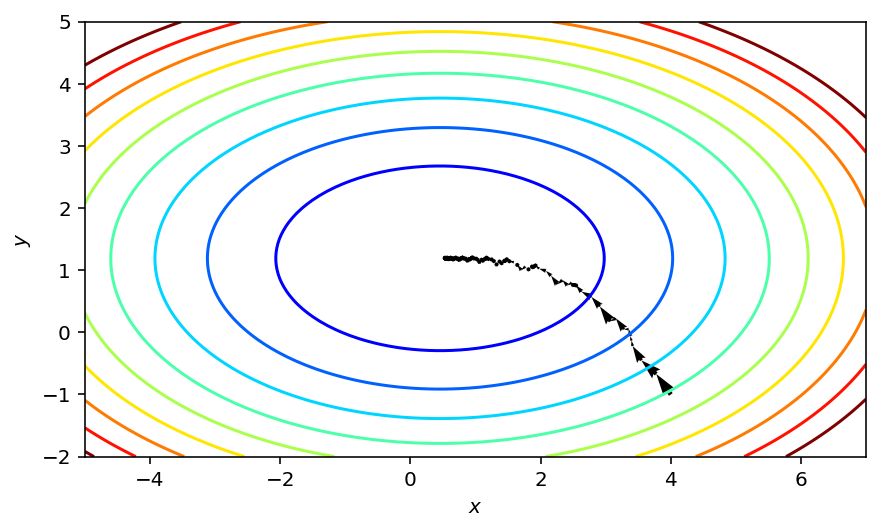

In [8]:
contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))

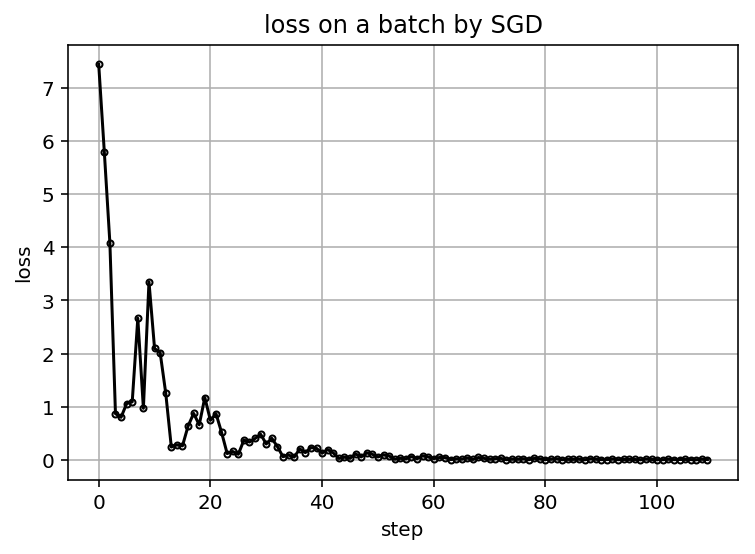

In [9]:
plt.plot(batch_loss, '.-k', markerfacecolor='none')
plt.grid()
plt.xlabel('step')
plt.ylabel('loss')
plt.title('loss on a batch by SGD')
plt.show()

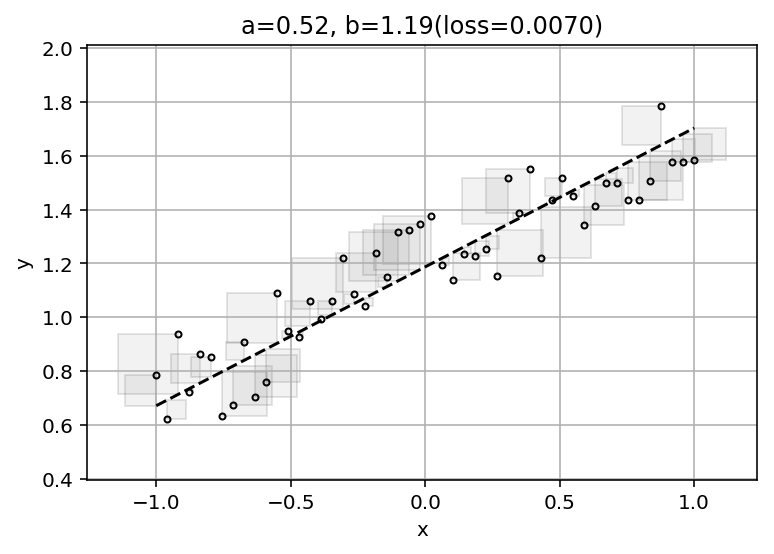

In [10]:
from matplotlib.patches import Rectangle
def visualize_l2(w, b, x_train, y_train, loss):
    from matplotlib.patches import Rectangle
    loss_name = 'loss'
    plt.plot(x_train, y_train, '.k', markerfacecolor='none')
    plt.plot(x_train, w * x_train + b, '--k')
    currentAxis = plt.gca()
    for xx,yy in zip(x_train, y_train):
        currentAxis.add_patch(Rectangle((xx, yy), 
                                        w * xx + b - yy, w * xx + b - yy,
                              alpha=0.1, facecolor='gray', edgecolor='k'))
    plt.grid()
    plt.axis('equal')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("a={:1.2f}, b={:1.2f}(loss={:5.4f})".format(w, b, loss))
    
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

### 7.3.2 모멘텀/네스테로프 방법

In [11]:
# Momentum
batch_size = 5 # 뱃치 크기
epsilon = 0.03 # 학습률
MaxEpochs = 10 # 반복 횟수

alpha = 0.9
velocity = np.zeros_like(w0)
paths = []
batch_loss = []

w0 = np.array([4.0, -1.0]) # 1) 초깃값

# 2) 데이터 셔플링 전과 동일

# 알고리즘
for epoch in range(MaxEpochs+1): # 5) MaxEpochs번 반복
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        epsilon = epsilon # 4)-2 학습률 설정
        velocity = alpha * velocity - epsilon * grad # 4)-3 탐색 방향 설정
        dw = velocity # 4)-4 파라미터 업데이트
        w0 = w0 + dw
    print('{:02d}\t{}\t{:5.4f}'.format(epoch, w0, loss(w0, x_train, y_train)))

00	[2.54087178 1.07028554]	0.7685
01	[0.72063777 1.93419136]	0.2945
02	[-0.05965121  1.115134  ]	0.0552
03	[-0.01191224  0.95949615]	0.0711
04	[0.29092257 1.26808092]	0.0140
05	[0.50165107 1.26688907]	0.0096
06	[0.54759617 1.15503489]	0.0085
07	[0.50399125 1.17225725]	0.0070
08	[0.45714916 1.20952484]	0.0066
09	[0.43965236 1.19863576]	0.0065
10	[0.4430227  1.18772071]	0.0064


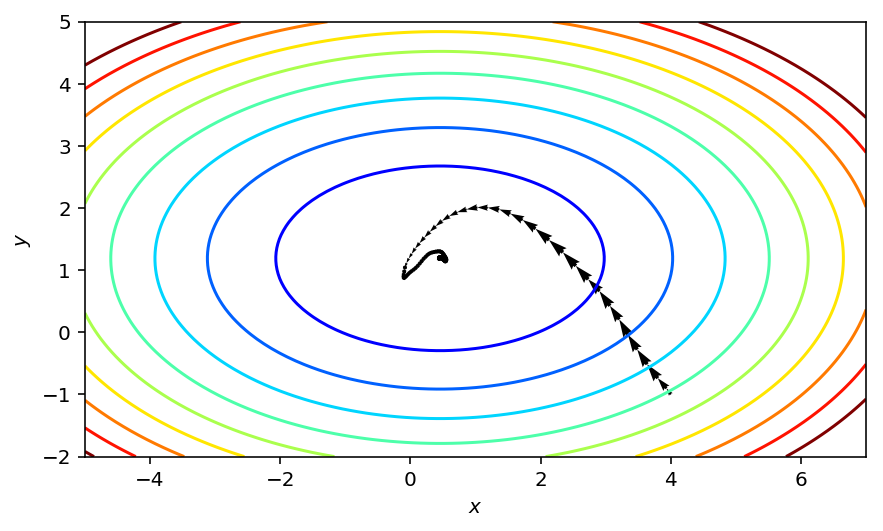

In [12]:
contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))

00	[0.10585533 1.81362926]	0.2211
01	[-0.2352479   1.11762729]	0.0918
02	[0.72760971 1.21320139]	0.0195
03	[0.54032128 1.15984597]	0.0082
04	[0.34345632 1.22056753]	0.0090
05	[0.46037633 1.19144309]	0.0064
06	[0.47061857 1.19313707]	0.0064
07	[0.43780416 1.19751697]	0.0065
08	[0.44595802 1.19644287]	0.0064
09	[0.45163869 1.19542362]	0.0064
10	[0.44767895 1.1961166 ]	0.0064


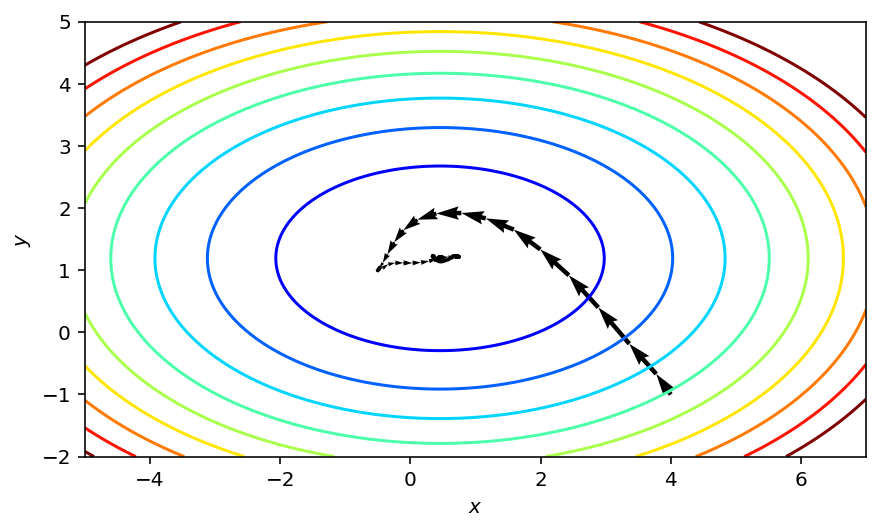

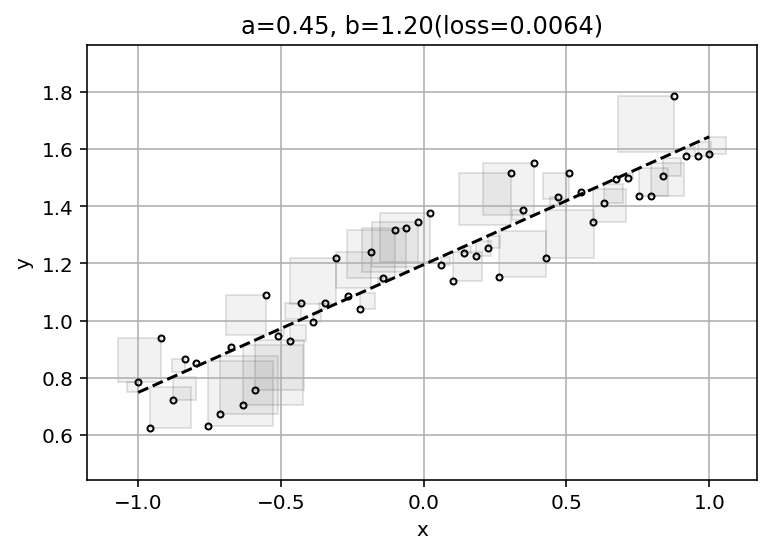

In [13]:
# Nesterov
batch_size = 5 # 뱃치 크기
epsilon = 0.03 # 학습율
MaxEpochs = 10 # 반복 횟수

alpha = 0.9
velocity = np.zeros_like(w0)
paths = []
batch_loss = []

w0 = np.array([4.0, -1.0]) # 1) 초기값

# 2) 데이터 셔플링
np.random.seed(320)
idx = np.arange(len(x_train))
np.random.shuffle(idx)
shuffled_x_train = x_train[idx]
shuffled_y_train = y_train[idx]

# 알고리즘
for epoch in range(MaxEpochs+1): # 5) MaxEpochs번 반복
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0 + alpha * velocity, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        velocity = alpha * velocity - lr * grad # 4)-2 탐색방향 설정
        lr = lr # 4)-3 학습율 설정
        dw = velocity # 4)-4 파라미터 업데이트
        w0 = w0 + dw
    print('{:02d}\t{}\t{:5.4f}'.format(epoch, w0, loss(w0, x_train, y_train)))
    
contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

## 7.4 학습률 기반 알고리즘

### 7.4.1 적응형 학습률 방법의 필요성

00	[0.59170786 1.24317207]	0.0110
01	[0.48223683 1.19754365]	0.0065
02	[0.47766067 1.19867973]	0.0065
03	[0.47756153 1.19850082]	0.0065
04	[0.4775554  1.19848961]	0.0065
05	[0.47755502 1.19848891]	0.0065
06	[0.47755499 1.19848886]	0.0065
07	[0.47755499 1.19848886]	0.0065
08	[0.47755499 1.19848886]	0.0065
09	[0.47755499 1.19848886]	0.0065
10	[0.47755499 1.19848886]	0.0065


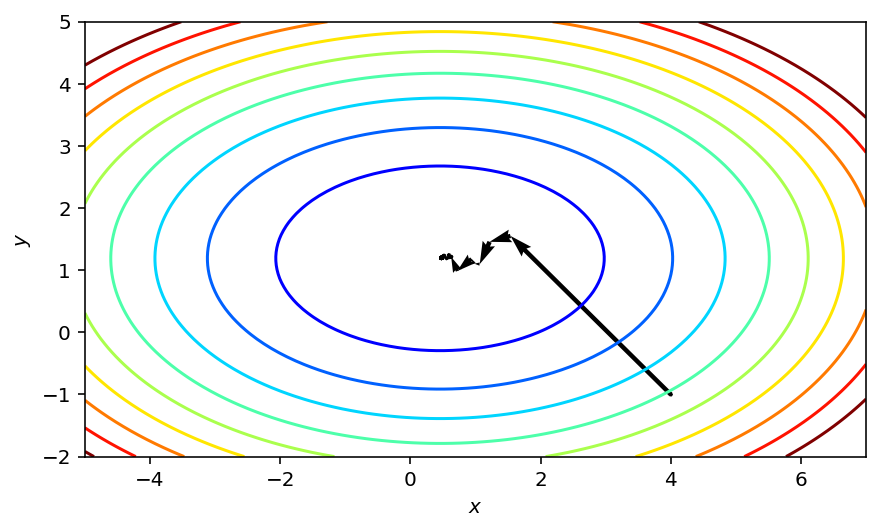

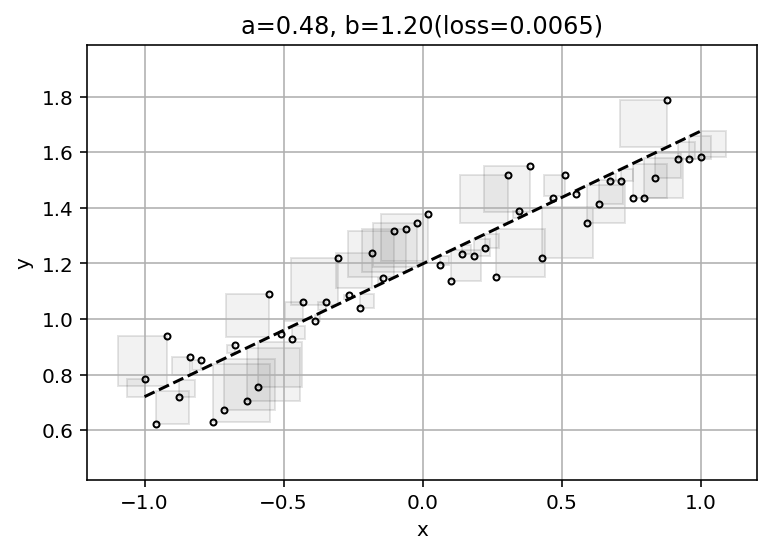

In [14]:
# 적응형 알고리즘
batch_size = 5 # 뱃치 크기
lr = 2.0 # 학습률
MaxEpochs = 10 # 반복 횟수
search_direction = np.zeros_like(w0)

paths = []
batch_loss = []
w0 = np.array([4.0, -1.0]) # 1) 초깃값

# 2) 데이터 셔플링은 생략합니다.

# 알고리즘
for epoch in range(MaxEpochs+1): # 5) MaxEpochs번 반복
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        lr = lr # 4)-3 학습률 설정
        # 4)-4 파라미터 업데이트
        dw = lr * search_direction 
        w1 = w0 + dw
        # 적응형 알고리즘 예
        loss0, loss1 = loss(w0, x_train, y_train), loss(w1, x_train, y_train)
        if loss0 > loss1:
            w0 = w1
        else:
            lr = lr / 2
    print('{:02d}\t{}\t{:5.4f}'.format(epoch, w0, loss(w0, x_train, y_train)))

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

### 7.4.2 Adagrad

Iter	w_k		grad		dw		loss
1-00	[2.00 4.00]
1-01	[3.00 3.00]	[-0.30 2.36]	[1.00 -1.00]	2.7654
1-02	[2.02 2.45]	[1.39 1.56]	[-0.98 -0.55]	1.2226
1-03	[1.81 2.15]	[0.30 0.90]	[-0.21 -0.30]	0.7821
1-04	[1.55 1.78]	[0.40 1.17]	[-0.26 -0.37]	0.3872
1-05	[1.35 1.54]	[0.32 0.78]	[-0.21 -0.24]	0.2051
1-06	[1.28 1.43]	[0.10 0.37]	[-0.06 -0.11]	0.1530
1-07	[1.00 1.25]	[0.45 0.58]	[-0.28 -0.17]	0.0603
1-08	[0.92 1.26]	[0.13 -0.03]	[-0.08 0.01]	0.0463
1-09	[0.73 1.16]	[0.31 0.35]	[-0.19 -0.10]	0.0199
1-10	[0.64 1.21]	[0.14 -0.17]	[-0.09 0.05]	0.0127
2-01	[0.63 1.20]	[0.03 0.01]	[-0.02 -0.00]	0.0116
2-02	[0.57 1.20]	[0.10 0.02]	[-0.06 -0.01]	0.0086
2-03	[0.52 1.22]	[0.08 -0.07]	[-0.05 0.02]	0.0075
2-04	[0.53 1.23]	[-0.02 -0.02]	[0.01 0.01]	0.0079
2-05	[0.51 1.23]	[0.02 -0.00]	[-0.01 0.00]	0.0076
2-06	[0.51 1.22]	[0.00 0.02]	[-0.00 -0.01]	0.0073
2-07	[0.48 1.20]	[0.06 0.06]	[-0.04 -0.02]	0.0065
2-08	[0.50 1.19]	[-0.04 0.04]	[0.03 -0.01]	0.0068
2-09	[0.46 1.17]	[0.08 0.06]	[-0.05 -0.02]	0.0066
2-10	[0.

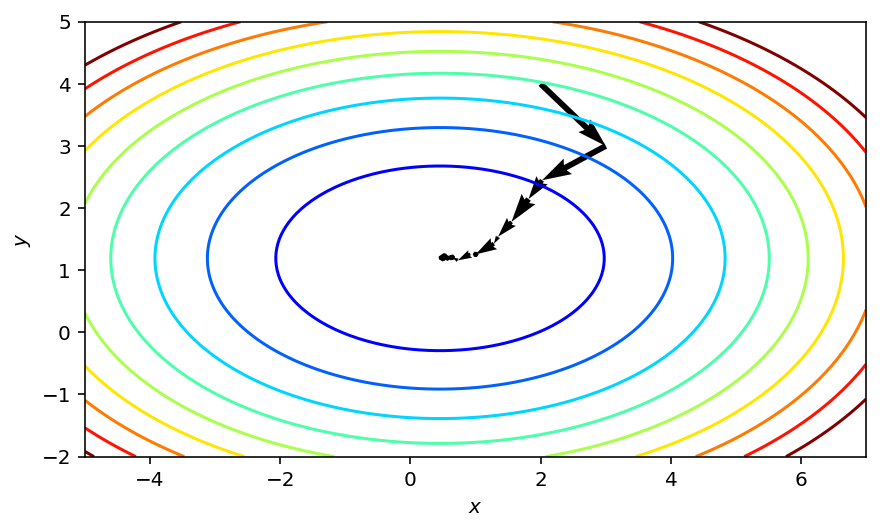

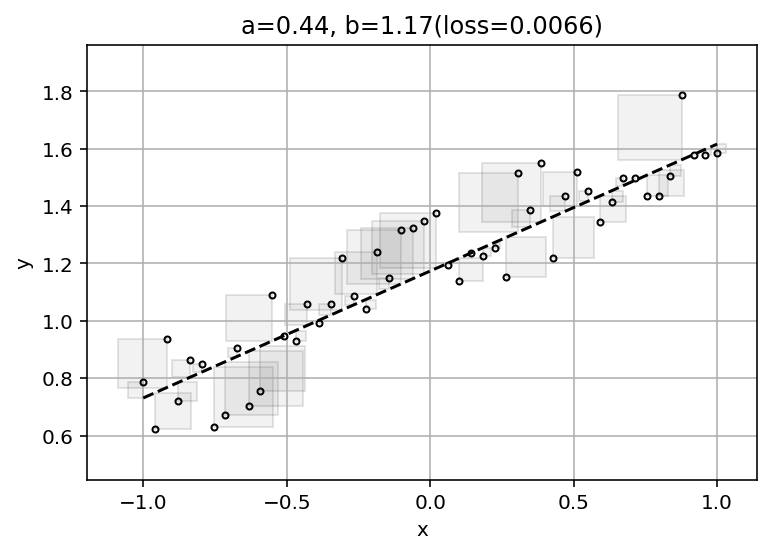

In [15]:
# Adagrad
batch_size = 5 # 뱃치 크기
MaxEpochs = 2 # 반복 횟수

epsilon = 1.0
delta = 1E-7
r = np.zeros_like(w0)

paths = []
batch_loss = []

w0 = np.array([2.0, 4.0]) # 1) 초깃값
print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
print('{:01d}-{:02d}\t{}'.format(1,0,np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x})))

# 2) 데이터 셔플링 : 생략

# 알고리즘
for epoch in range(MaxEpochs): # 5) MaxEpochs번 반복
    k = 0
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        # 4)-3 학습률 설정
        r = r  + grad * grad
        lr = epsilon / (delta + np.sqrt(r)) 
        dw = lr * search_direction # 4)-4 파라미터 업데이트
        w0 = w0 + dw
        print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'.format(epoch+1,k +1, 
                                                  np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(grad, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(dw, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  loss(w0, x_train, y_train)))
        k += 1
        
contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

### 7.4.3 RMSProp(Root Mean Square Propagation)

Iter	w_k		grad		dw		loss
1-00	[2.00 4.00]
1-01	[2.79 3.21]	[-0.30 2.36]	[0.79 -0.79]	2.9888
1-02	[2.02 2.72]	[1.24 1.79]	[-0.77 -0.49]	1.5922
1-03	[1.86 2.40]	[0.25 1.17]	[-0.16 -0.31]	1.0830
1-04	[1.57 2.04]	[0.46 1.44]	[-0.29 -0.36]	0.5848
1-05	[1.33 1.78]	[0.38 1.05]	[-0.24 -0.26]	0.3131
1-06	[1.26 1.62]	[0.11 0.61]	[-0.07 -0.16]	0.2115
1-07	[0.93 1.42]	[0.52 0.76]	[-0.33 -0.20]	0.0718
1-08	[0.88 1.38]	[0.07 0.16]	[-0.05 -0.04]	0.0555
1-09	[0.64 1.25]	[0.36 0.45]	[-0.24 -0.13]	0.0142
1-10	[0.60 1.26]	[0.06 -0.03]	[-0.04 0.01]	0.0124
2-01	[0.61 1.23]	[-0.01 0.08]	[0.01 -0.03]	0.0114
2-02	[0.54 1.22]	[0.08 0.06]	[-0.07 -0.02]	0.0080
2-03	[0.48 1.23]	[0.07 -0.05]	[-0.06 0.02]	0.0074
2-04	[0.50 1.24]	[-0.02 -0.02]	[0.02 0.01]	0.0079
2-05	[0.48 1.24]	[0.02 0.01]	[-0.02 -0.00]	0.0075
2-06	[0.48 1.22]	[0.00 0.03]	[-0.00 -0.01]	0.0070
2-07	[0.43 1.20]	[0.05 0.06]	[-0.05 -0.02]	0.0065
2-08	[0.49 1.18]	[-0.06 0.05]	[0.06 -0.02]	0.0068
2-09	[0.42 1.15]	[0.07 0.04]	[-0.07 -0.02]	0.0073
2-10	[0.

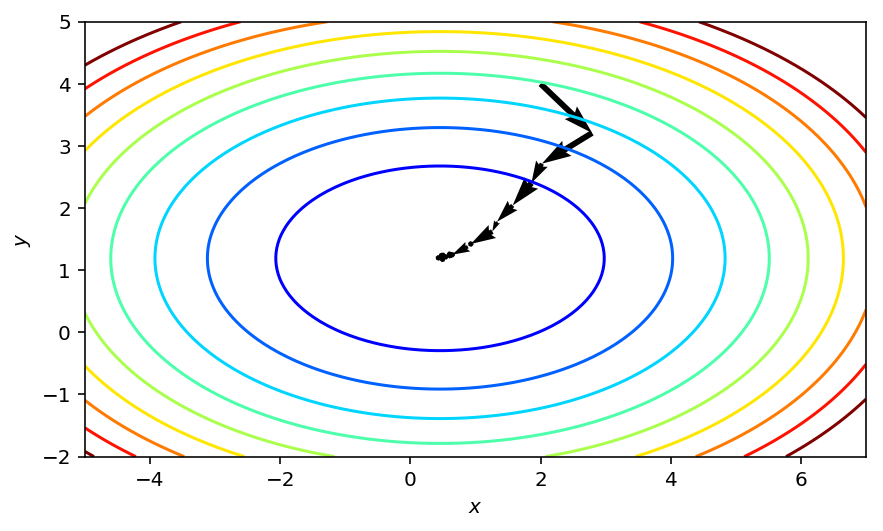

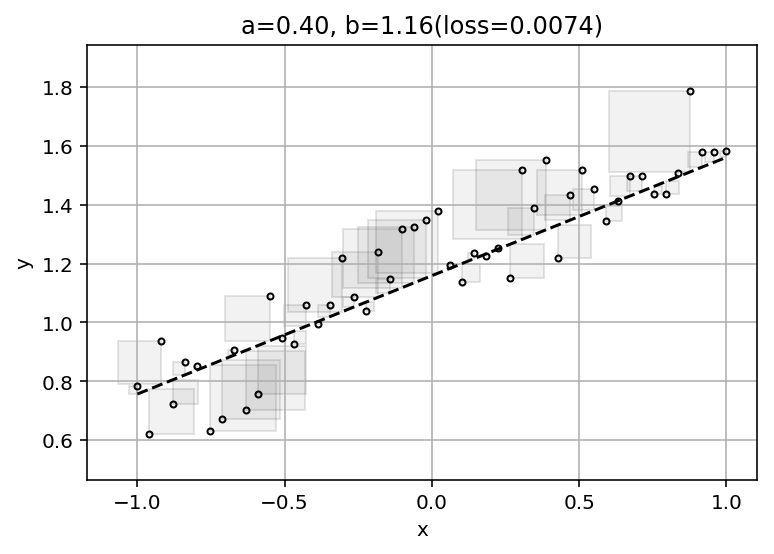

In [16]:
# RMSProp
batch_size = 5 # 뱃치 크기
MaxEpochs = 2 # 반복 횟수

epsilon = 0.25
delta = 1E-10
rho = 0.9
r = np.zeros_like(w0)

paths = []
batch_loss = []

w0 = np.array([2.0, 4.0]) # 1) 초깃값
print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
print('{:01d}-{:02d}\t{}'.format(1,0,np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x})))

# 2) 데이터 셔플링 : 생략

# 알고리즘
for epoch in range(MaxEpochs): # 5) MaxEpochs번 반복
    k = 0
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        search_direction = -grad # 4)-2 탐색 방향 설정
        # 4)-3 학습률 설정
        r = rho * r  + (1. - rho) * grad * grad
        lr = epsilon / np.sqrt(delta + r)
        dw = lr * search_direction # 4)-4 파라미터 업데이트
        w0 = w0 + dw
        print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'.format(epoch+1,k +1, 
                                                  np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(grad, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(dw, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  loss(w0, x_train, y_train)))
        k += 1

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))

### 7.4.4 Adam

Iter	w_k		grad		dw		loss
1-00	[2.00 4.00]
1-01	[3.00 3.00]	[0.30 -2.36]	[1.00 -1.00]	2.7654
1-02	[2.41 2.03]	[-0.59 -1.94]	[-0.59 -0.97]	1.0232
1-03	[1.77 1.20]	[-0.56 -1.37]	[-0.64 -0.83]	0.3066
1-04	[1.18 0.47]	[-0.45 -1.04]	[-0.59 -0.72]	0.3536
1-05	[0.69 -0.01]	[-0.33 -0.63]	[-0.49 -0.49]	0.7384
1-06	[0.28 -0.20]	[-0.25 -0.24]	[-0.41 -0.19]	0.9766
1-07	[0.13 -0.14]	[-0.09 0.08]	[-0.15 0.06]	0.9049
1-08	[-0.04 0.08]	[-0.10 0.28]	[-0.17 0.22]	0.6671
1-09	[0.02 0.43]	[0.04 0.45]	[0.07 0.35]	0.3317
1-10	[0.02 0.80]	[-0.00 0.46]	[-0.00 0.37]	0.1173
2-01	[0.04 1.15]	[0.01 0.42]	[0.03 0.36]	0.0366
2-02	[0.14 1.47]	[0.05 0.36]	[0.09 0.31]	0.0623
2-03	[0.25 1.72]	[0.06 0.27]	[0.11 0.25]	0.1519
2-04	[0.34 1.89]	[0.04 0.18]	[0.09 0.17]	0.2528
2-05	[0.38 1.97]	[0.02 0.08]	[0.04 0.08]	0.3102
2-06	[0.41 1.95]	[0.02 -0.02]	[0.03 -0.02]	0.2943
2-07	[0.36 1.84]	[-0.02 -0.11]	[-0.05 -0.11]	0.2199
2-08	[0.37 1.66]	[0.01 -0.18]	[0.02 -0.18]	0.1184
2-09	[0.32 1.44]	[-0.02 -0.21]	[-0.06 -0.22]	0.0416
2-

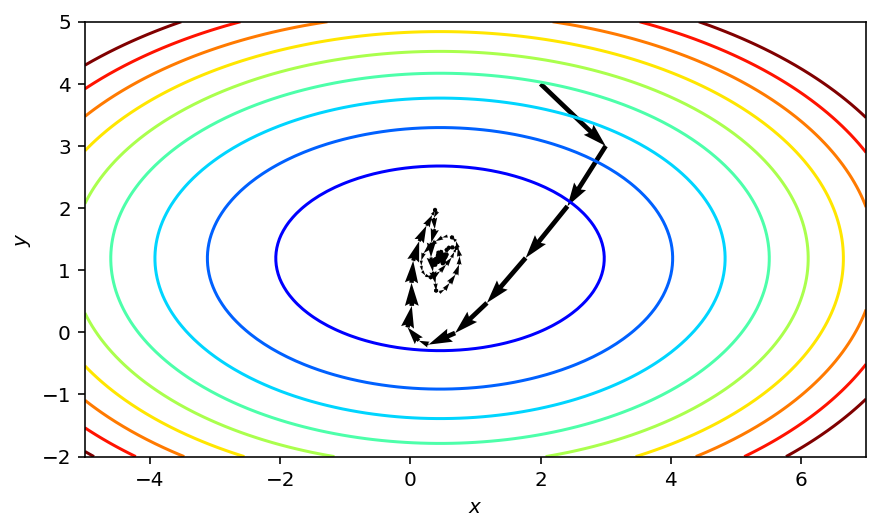

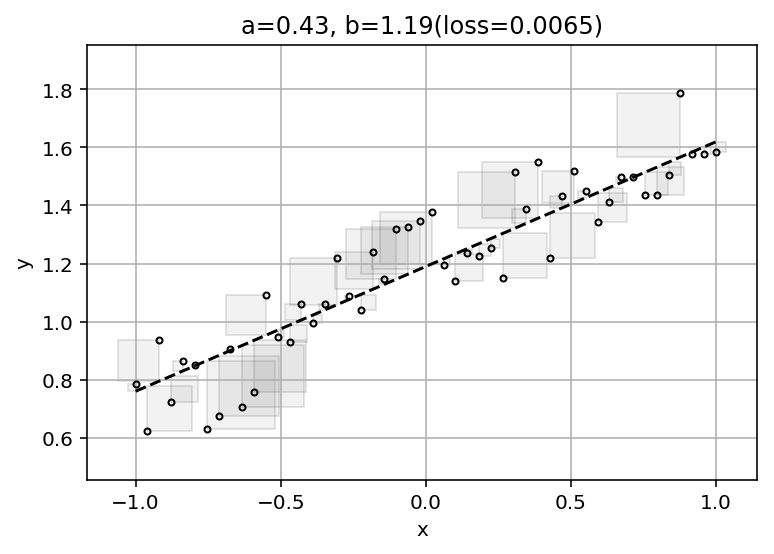

In [17]:
# Adam
batch_size = 5 # 뱃치 크기
MaxEpochs = 10 # 반복 횟수

epsilon = 1.0
delta = 1E-8
rho1 = 0.9
rho2 = 0.999
s = np.zeros_like(w0)
r = np.zeros_like(w0)
t = 0

paths = []
batch_loss = []

w0 = np.array([2.0, 4.0]) # 1) 초깃값
print('Iter\tw_k\t\tgrad\t\tdw\t\tloss')
print('{:01d}-{:02d}\t{}'.format(1,0,np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x})))

# 2) 데이터 셔플링 : 생략

# 알고리즘
for epoch in range(MaxEpochs): # 5) MaxEpochs번 반복
    k = 0
    for x_batch, y_batch in generate_batches(batch_size, shuffled_x_train, shuffled_y_train): # 3) 미니 뱃치 생성
        paths.append(w0)
        batch_loss.append(loss(w0, x_batch, y_batch))
        grad = loss_grad(w0, x_batch, y_batch) # 4)-1 미니 뱃치에서 그래디언트 계산
        
        s = rho1 * s  + (1. - rho1) * grad
        r = rho2 * r  + (1. - rho2) * (grad * grad)
        t += 1
        shat = s / ( 1. - rho1 ** t)
        rhat = r / ( 1. - rho2 ** t)
        
        search_direction = -shat # 4)-2 탐색 방향 설정
        # 4)-3 학습률 설정        
        lr = epsilon / (delta + np.sqrt(rhat))
        dw = lr * search_direction # 4)-4 파라미터 업데이트
        w0 = w0 + dw
        print('{:01d}-{:02d}\t{}\t{}\t{}\t{:5.4f}'.format(epoch+1,k +1, 
                                                  np.array2string(w0, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(search_direction, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  np.array2string(dw, formatter={'float_kind':lambda x: "%.2f" % x}),
                                                  loss(w0, x_train, y_train)))
        k += 1

contour_with_path(LOSSW, W0, W1, paths, norm=None, level=np.linspace(0, 10, 10))
visualize_l2(w0[0], w0[1], x_train, y_train, loss(w0, x_train, y_train))